In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv(r"D:\Coding\Energy-Management_Project\data\opsd-time_series-2020-10-06\time_series_60min_singleindex.csv",parse_dates=['utc_timestamp'])

In [41]:
df.head(10)

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
5,2015-01-01 04:00:00+00:00,2015-01-01T05:00:00+0100,5309.0,6609.0,35.0,NaN,64.0,8487.0,8806.0,NaN,...,998.67,824.0,NaN,1.60,2626.0,2790.0,3.8,NaN,NaN,NaN
6,2015-01-01 05:00:00+00:00,2015-01-01T06:00:00+0100,5574.0,6543.0,35.0,NaN,84.0,8428.0,8805.0,NaN,...,1045.17,886.0,NaN,0.00,2641.0,2830.0,3.8,NaN,NaN,NaN
7,2015-01-01 06:00:00+00:00,2015-01-01T07:00:00+0100,5925.0,6851.0,36.0,NaN,131.0,8122.0,8651.0,NaN,...,1085.06,985.0,NaN,0.00,2622.0,2790.0,3.8,NaN,NaN,NaN
8,2015-01-01 07:00:00+00:00,2015-01-01T08:00:00+0100,6343.0,7061.0,36.0,2.0,109.0,8179.0,8674.0,NaN,...,1142.36,1109.0,NaN,0.00,2691.0,2980.0,3.9,NaN,NaN,NaN
9,2015-01-01 08:00:00+00:00,2015-01-01T09:00:00+0100,6882.0,7233.0,41.0,10.0,146.0,8340.0,9037.0,92.66,...,1206.03,1209.0,4.97,0.00,2794.0,3070.0,8.0,NaN,NaN,NaN


#### Coverting Timestamp to proper format for time series

In [42]:
# to datetime format
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp']) 

In [43]:
# utc to local timezone
df['local_timestamp'] = df['utc_timestamp'].dt.tz_convert('Europe/Berlin')

In [44]:
# format timestamp to readability
df['formatted_timestamp'] = df['utc_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [45]:
df['utc_timestamp']

0       2014-12-31 23:00:00+00:00
1       2015-01-01 00:00:00+00:00
2       2015-01-01 01:00:00+00:00
3       2015-01-01 02:00:00+00:00
4       2015-01-01 03:00:00+00:00
                   ...           
50396   2020-09-30 19:00:00+00:00
50397   2020-09-30 20:00:00+00:00
50398   2020-09-30 21:00:00+00:00
50399   2020-09-30 22:00:00+00:00
50400   2020-09-30 23:00:00+00:00
Name: utc_timestamp, Length: 50401, dtype: datetime64[ns, UTC]

In [46]:
df.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency,local_timestamp,formatted_timestamp
0,2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00+01:00,2014-12-31 23:00:00
1,2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 01:00:00+01:00,2015-01-01 00:00:00
2,2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN,2015-01-01 02:00:00+01:00,2015-01-01 01:00:00
3,2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN,2015-01-01 03:00:00+01:00,2015-01-01 02:00:00
4,2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN,2015-01-01 04:00:00+01:00,2015-01-01 03:00:00


### Filter Columns

In [47]:
# Define the columns to keep
selected_columns = [
    'utc_timestamp', 
    'DE_load_actual_entsoe_transparency', 
    'DE_solar_generation_actual', 
    'DE_wind_generation_actual', 
    'DE_wind_offshore_generation_actual', 
    'DE_wind_onshore_generation_actual'
]

# Filter the DataFrame to keep only the selected columns
df = df[selected_columns]

# Now check missing values again
missing_summary = df.isna().sum()
missing_percent = (missing_summary / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_summary,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

# Show columns with missing values (if any)
print(missing_df[missing_df['Missing Values'] > 0])


                                    Missing Values  Missing %
DE_solar_generation_actual                     104   0.206345
DE_wind_generation_actual                       75   0.148807
DE_wind_offshore_generation_actual              75   0.148807
DE_wind_onshore_generation_actual               73   0.144838
DE_load_actual_entsoe_transparency               1   0.001984


In [71]:
# rename columns

df.rename(columns={
    'DE_load_actual_entsoe_transparency': 'actual_load',
    'DE_solar_generation_actual': 'solar_generation',
    'DE_wind_generation_actual': 'wind_generation',
    'DE_wind_offshore_generation_actual': 'wind_offshore',
    'DE_wind_onshore_generation_actual': 'wind_onshore'
}, inplace=True)

# Verify the column names
print(df.columns)


Index(['actual_load', 'solar_generation', 'wind_generation', 'wind_offshore',
       'wind_onshore'],
      dtype='object')


### Indexing the Dataframe

In [48]:
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])  # Ensure correct format
df.set_index('utc_timestamp', inplace=True)  # Set as index
df.interpolate(method='time', inplace=True)  # Apply interpolation


In [ ]:
# interpolation is done for smoothening the time series

df.interpolate(method='time', inplace=True)  # Works well for time-indexed data


In [51]:
# Forward and Backward fill, to handle missing values

df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(method='bfill', inplace=True)  # Backward fill


C:\Users\rrous\AppData\Local\Temp\ipykernel_22348\275232552.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
C:\Users\rrous\AppData\Local\Temp\ipykernel_22348\275232552.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


In [52]:
#Rolling Window Imputation (For smoothing fluctuations)If the data has seasonality or trends, using a rolling mean can help

df.fillna(df.rolling(window=3, min_periods=1).mean(), inplace=True)

In [55]:
df.dropna(inplace=True)

In [72]:
df.columns

Index(['actual_load', 'solar_generation', 'wind_generation', 'wind_offshore',
       'wind_onshore'],
      dtype='object')

In [73]:
print(df.index.dtype)  # If utc_timestamp is the index
print(df.dtypes)  # If utc_timestamp is a column


datetime64[ns, UTC]
actual_load         float64
solar_generation    float64
wind_generation     float64
wind_offshore       float64
wind_onshore        float64
dtype: object


In [74]:
missing_summary = df.isna().sum()
print(missing_summary)


actual_load         0
solar_generation    0
wind_generation     0
wind_offshore       0
wind_onshore        0
dtype: int64


## Data Vizualisation

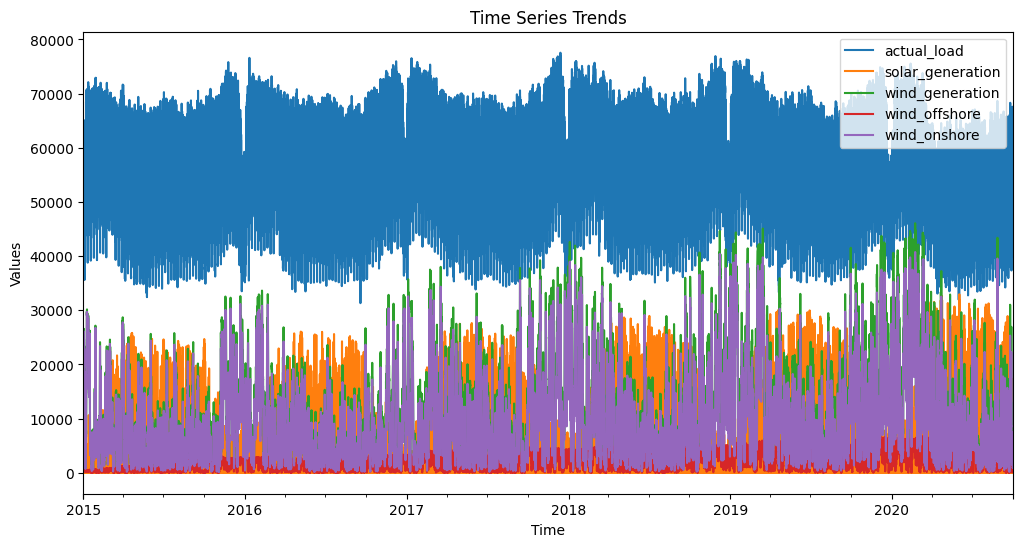

In [75]:
# Time series Trend

import matplotlib.pyplot as plt

df.plot(figsize=(12, 6), title="Time Series Trends")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend(loc="best")
plt.show()


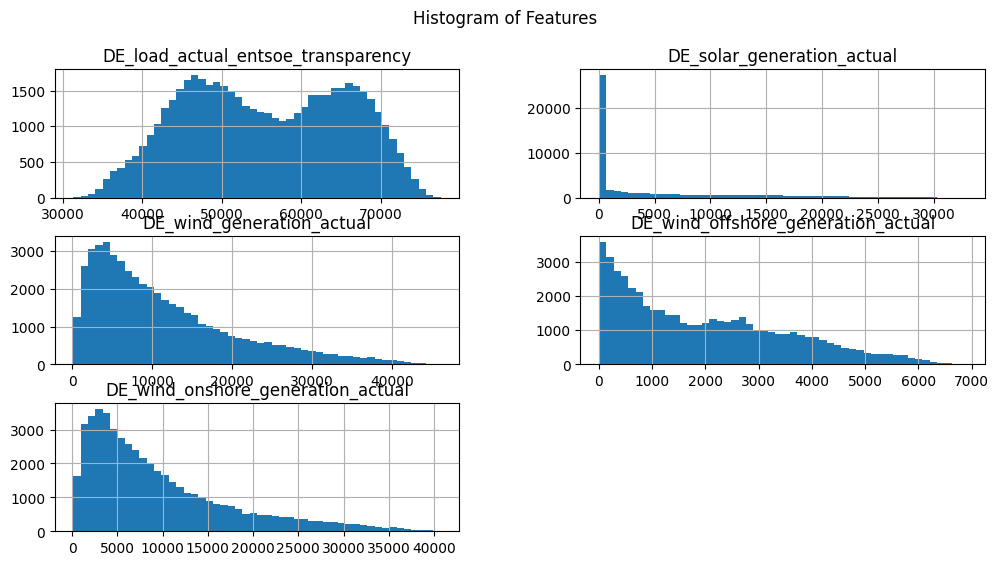

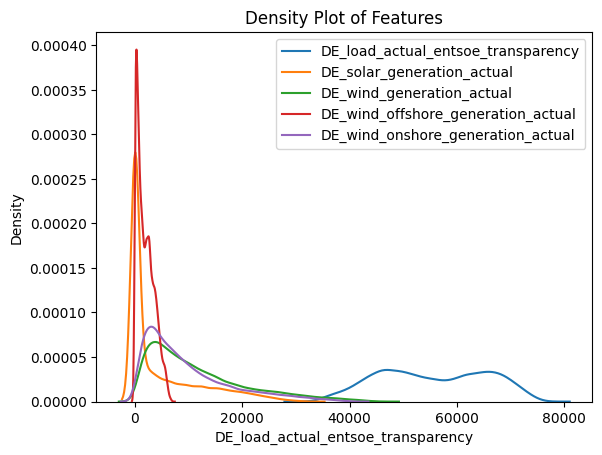

In [66]:
# How Distribution of Values for each feature

import seaborn as sns

df.hist(figsize=(12, 6), bins=50)
plt.suptitle("Histogram of Features")
plt.show()

# KDE (Kernel Density Estimation) for smoother distribution
for col in df.columns:
    sns.kdeplot(df[col], label=col)

plt.legend()
plt.title("Density Plot of Features")
plt.show()


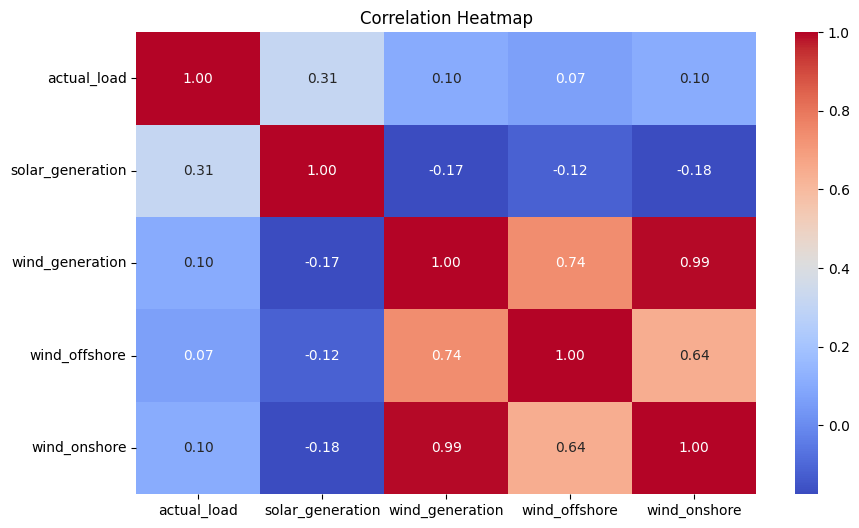

In [76]:
# Correlation heat map

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


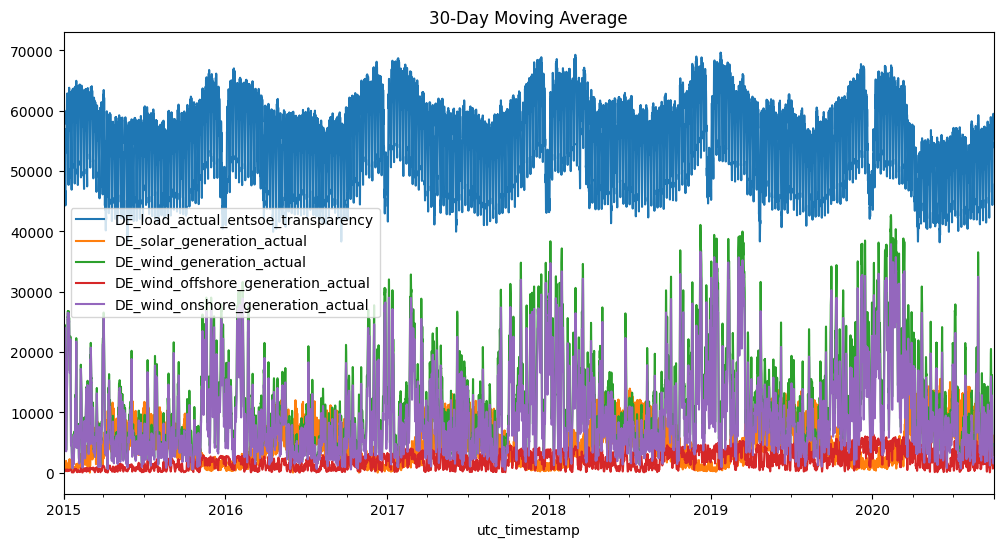

In [68]:
# Rolling mean and Moving average

df.rolling(window=30).mean().plot(figsize=(12, 6), title="30-Day Moving Average")
plt.show()


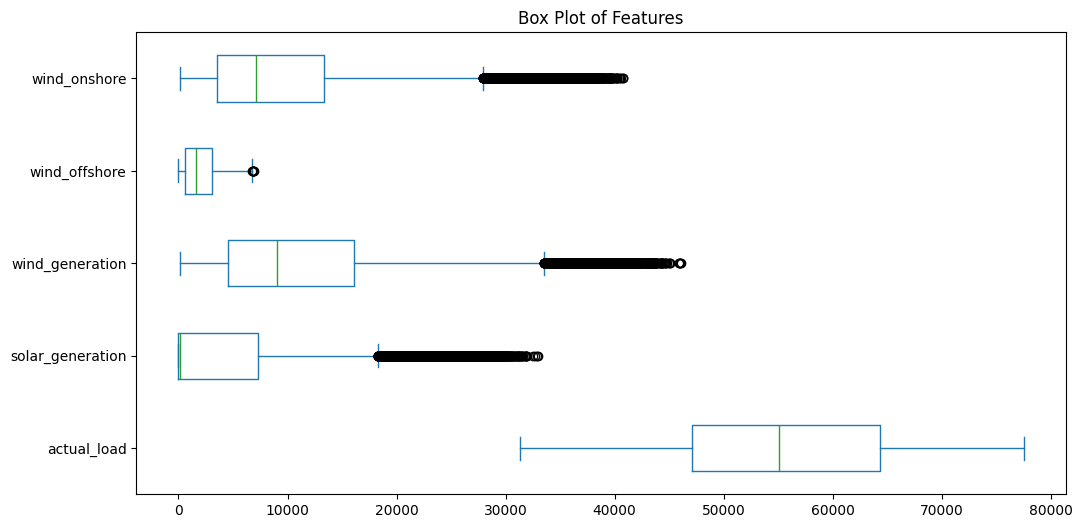

In [77]:
# Detecting outliers(identifies extreme values for each feature)

df.plot(kind='box', figsize=(12, 6), vert=False)
plt.title("Box Plot of Features")
plt.show()


### Download as CSV

In [78]:
df.to_csv("processed_data.csv", index=True)  # Saves with index (utc_timestamp)